# WIND SPEED ANALYSIS
## Student ID: 23021710
## Name: Sridhar Guggilla

In [1]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 
import os, joblib, missingno
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures,OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
from xgboost import XGBRegressor

# Data Importing

In [2]:
df=pd.read_csv("wind_dataset.csv")
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


## Statistical Analysis

In [4]:
df.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

## Descriptive Analysis

In [5]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


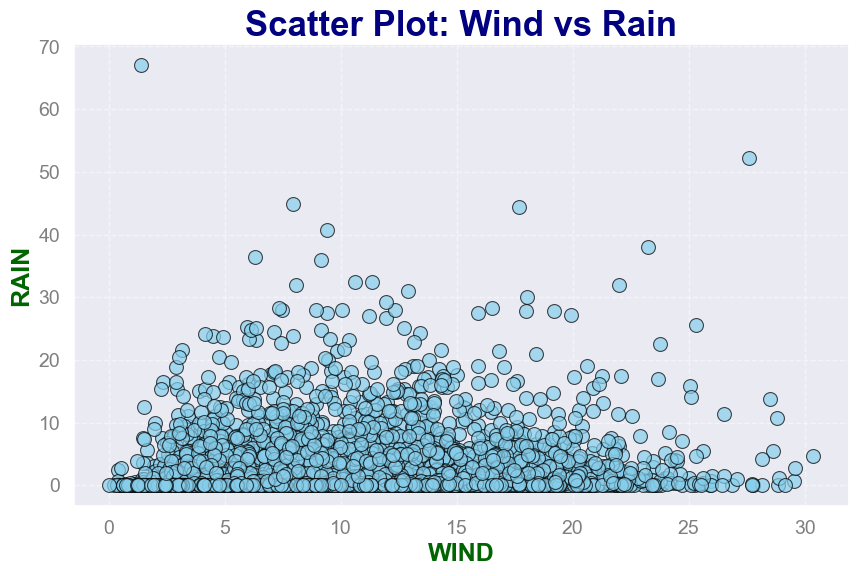

In [6]:
def plot_features(data, feature1, feature2, title):
    """
    Plot two features from a DataFrame in a stylish manner.

    Parameters:
    - data (DataFrame): Input DataFrame containing features.
    - feature1 (str): Name of the first feature (x-axis).
    - feature2 (str): Name of the second feature (y-axis).
    - title (str): Title of the plot.
    """
    # Set style
    sns.set(style='darkgrid', font_scale=1.3)
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature1, y=feature2, data=data, color='skyblue', edgecolor='black', alpha=0.7, s=100)
    
    # Set title and labels
    plt.title(title, fontsize=25, fontweight='bold', color='navy')
    plt.xlabel(feature1, fontsize=18, fontweight='bold', color='darkgreen')
    plt.ylabel(feature2, fontsize=18, fontweight='bold', color='darkgreen')
    
    # Increase tick label font size and color
    plt.xticks(fontsize=14, color='gray')
    plt.yticks(fontsize=14, color='gray')
    
    # Add grid with dashed lines
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
    
    plt.show()

# Example usage
plot_features(df, 'WIND', 'RAIN', 'Scatter Plot: Wind vs Rain')

## Histograms

In [7]:
def plot_histograms(data, features):
    """
    Plot histograms for multiple features in the dataset using subplots.

    Parameters:
        data (DataFrame): Input dataset.
            The dataset containing the features for which histograms are to be plotted.
        features (list): List of feature names.
            The names of the features for which histograms are to be plotted.

    Returns:
        None

    Raises:
        None
    """
    num_features = len(features)
    num_cols = 2
    num_rows = (num_features + num_cols - 1) // num_cols

    plt.figure(figsize=(7, 7))

    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(data=data, x=feature, kde=True)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f'Histogram of {feature}')

    plt.tight_layout()
   
    plt.show()

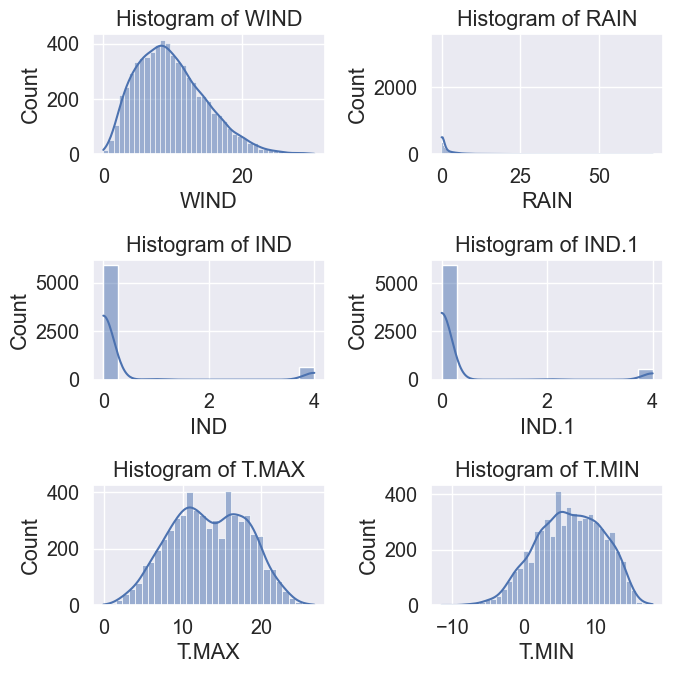

In [8]:
features = ['WIND', 'RAIN', 'IND', 'IND.1','T.MAX','T.MIN']
plot_histograms(df, features)

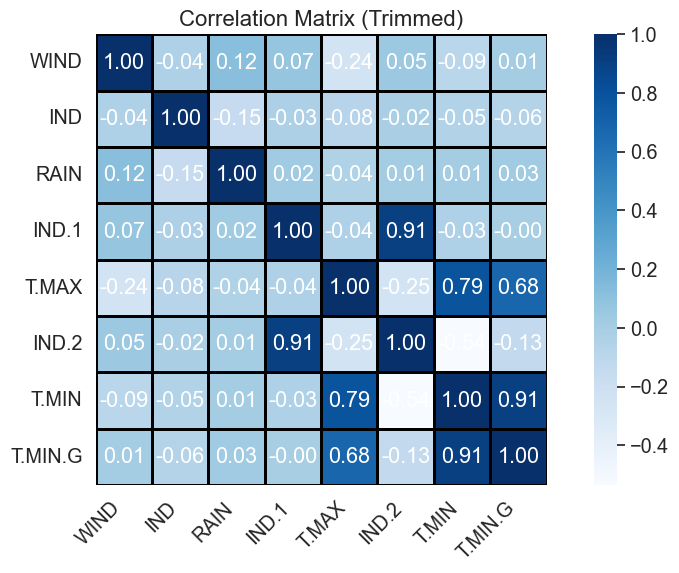

In [28]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Remove bottom 4 rows and columns
correlation_matrix_trimmed = correlation_matrix.iloc[:-4, :-4]

# Plot trimmed correlation matrix heatmap with enhanced styling
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_trimmed, annot=True, cmap='Blues', fmt='.2f', linewidths=1, linecolor='black', cbar=True, square=True, annot_kws={"color": 'white'})
plt.title('Correlation Matrix (Trimmed)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Data Preprocessing

In [10]:
df['DATE']=pd.to_datetime(df['DATE'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6513 non-null   float64       
 5   T.MAX    5953 non-null   float64       
 6   IND.2    6513 non-null   float64       
 7   T.MIN    5900 non-null   float64       
 8   T.MIN.G  6214 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [12]:
df['date_year']=df['DATE'].dt.year  #year
df['date_month_no']=df['DATE'].dt.month  #month
df['date_day']=df['DATE'].dt.day  # day
df=df.drop(columns=['DATE'])
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,date_year,date_month_no,date_day
0,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WIND           6574 non-null   float64
 1   IND            6574 non-null   int64  
 2   RAIN           6574 non-null   float64
 3   IND.1          6513 non-null   float64
 4   T.MAX          5953 non-null   float64
 5   IND.2          6513 non-null   float64
 6   T.MIN          5900 non-null   float64
 7   T.MIN.G        6214 non-null   float64
 8   date_year      6574 non-null   int32  
 9   date_month_no  6574 non-null   int32  
 10  date_day       6574 non-null   int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 488.0 KB


In [14]:
## Split the whole Dataset to Feature & Target
X = df.drop(columns=['WIND'], axis=1)   ## Features
y = df['WIND']   ## target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (5587, 10)
y_train shape --  (5587,)
X_test shape --  (987, 10)
y_test shape --  (987,)


# MODELING

In [16]:
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipeline.fit_transform(X_train)  ## train
X_test_num = num_pipeline.transform(X_test) 

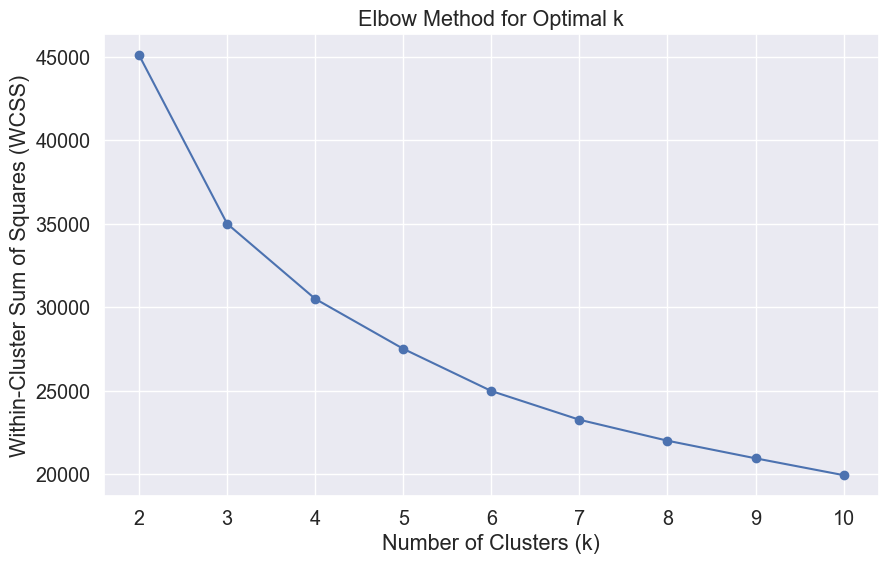

In [17]:
# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_num)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

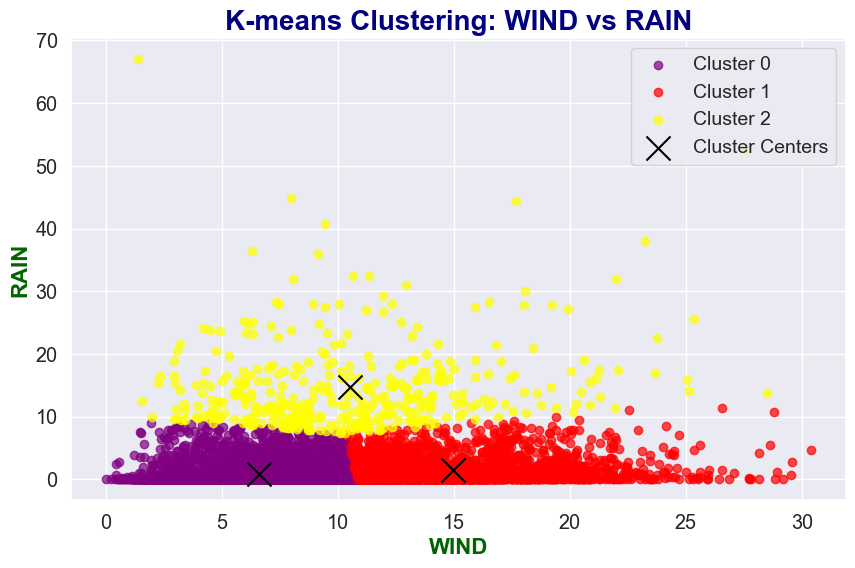

In [29]:
# Define the clusters with new feature names
km = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
df['cluster'] = km.fit_predict(df[['WIND', 'RAIN']])  # Fit K-means and assign cluster labels

# Set custom colors for clusters
cluster_colors = ['#800080', '#FF0000', '#FFFF00']

# Plot clusters with cluster centers
plt.figure(figsize=(10, 6))

# Plot each cluster using a different color
for cluster_label, color in zip(sorted(df['cluster'].unique()), cluster_colors):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['WIND'], cluster_data['RAIN'], label=f'Cluster {cluster_label}', alpha=0.7, color=color)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: WIND vs RAIN', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('WIND', fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel('RAIN', fontsize=16, fontweight='bold', color='darkgreen')

# Add legend at top right corner
plt.legend(fontsize=14, loc='upper right')
plt.grid(True)

plt.show()


# Linear Regression

In [19]:

def linear_regression_metrics(X_train, y_train, X_test, y_test):
    """
    Train a Linear Regression model, calculate R-squared score, mean squared error (MSE),
    and predict target variable using the test dataset.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (Series): Training target.
    - X_test (DataFrame): Test features.
    - y_test (Series): Test target.

    Returns:
    - Tuple: (R-squared score, MSE, Predicted target variable)
    """
    # Initialize and train Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    # Calculate R-squared score using cross-validation
    r2_scores = cross_val_score(estimator=lin_reg, X=X_train, y=y_train, cv=5, scoring='r2', n_jobs=-1)
    mean_r2_score = r2_scores.mean()
    
    # Predict target variable using the test dataset
    y_pred_test = lin_reg.predict(X_test)
    
    # Calculate mean squared error (MSE) on the test dataset
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    return mean_r2_score, mse_test, y_pred_test



In [20]:
# Example usage
mean_r2_score, mse_test, y_pred_test = linear_regression_metrics(X_train_num, y_train, X_test_num, y_test)

print(f'Mean R-squared score using Linear Regression: {mean_r2_score:.4f}')
print(f'Mean squared error (MSE) on test dataset: {mse_test:.4f}')

Mean R-squared score using Linear Regression: 0.1165
Mean squared error (MSE) on test dataset: 23.7565


# `RandomForestRegressor`

In [21]:
def random_forest_metrics(X_train, y_train, X_test, y_test, n_estimators=400, max_depth=18, max_samples=0.9, random_state=42):
    """
    Train a RandomForestRegressor model, calculate R-squared score, mean squared error (MSE),
    and predict target variable using the test dataset.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (Series): Training target.
    - X_test (DataFrame): Test features.
    - y_test (Series): Test target.
    - n_estimators (int): Number of trees in the forest.
    - max_depth (int): Maximum depth of the trees.
    - max_samples (float): Maximum number of samples used for each tree.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - Tuple: (R-squared score, MSE, Predicted target variable)
    """
    # Initialize and train RandomForestRegressor model
    forest_reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_samples=max_samples, 
                                        random_state=random_state, n_jobs=-1)
    forest_reg.fit(X_train, y_train)
    
    # Calculate R-squared score using cross-validation
    r2_scores = cross_val_score(estimator=forest_reg, X=X_train, y=y_train, cv=5, scoring='r2', n_jobs=-1)
    mean_r2_score = r2_scores.mean()
    
    # Predict target variable using the test dataset
    y_pred_test = forest_reg.predict(X_test)
    
    # Calculate mean squared error (MSE) on the test dataset
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    return mean_r2_score, mse_test, y_pred_test


In [22]:
mean_r2_score, mse_test, y_pred_test = random_forest_metrics(X_train_num, y_train, X_test_num, y_test)

print(f'Mean R-squared score using RandomForestRegressor: {mean_r2_score:.4f}')
print(f'Mean squared error (MSE) on test dataset: {mse_test:.4f}')

Mean R-squared score using RandomForestRegressor: 0.2608
Mean squared error (MSE) on test dataset: 19.6656


# `XGBRegressor`

In [23]:
def xgboost_metrics(X_train, y_train, X_test, y_test, n_estimators=150, max_depth=8, learning_rate=0.1, subsample=0.8):
    """
    Train an XGBoost model, calculate RMSE and R-squared scores, and predict target variable using the test dataset.

    Parameters:
    - X_train (DataFrame): Training features.
    - y_train (Series): Training target.
    - X_test (DataFrame): Test features.
    - y_test (Series): Test target.
    - n_estimators (int): Number of boosting rounds.
    - max_depth (int): Maximum depth of the trees.
    - learning_rate (float): Step size shrinkage used in updates to prevent overfitting.
    - subsample (float): Subsample ratio of the training instances.

    Returns:
    - Tuple: (Mean RMSE score, RMSE on test dataset, R-squared score, Predicted target variable)
    """
    # Initialize and train XGBoost model
    xgb_reg = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample)
    xgb_reg.fit(X_train, y_train)
    
    # Calculate RMSE scores using cross-validation
    rmse_scores = cross_val_score(estimator=xgb_reg, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse_scores = -1 * rmse_scores   # Convert negative scores to positive
    rmse_scores = np.sqrt(rmse_scores)
    mean_rmse_score = rmse_scores.mean()
    
    # Predict target variable using the test dataset
    y_pred_test = xgb_reg.predict(X_test)
    
    # Calculate RMSE on the test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    # Calculate R-squared score
    r2_test = r2_score(y_test, y_pred_test)
    
    return mean_rmse_score, rmse_test, r2_test, y_pred_test



In [24]:
# Example usage
mean_rmse_score, rmse_test, r2_test, y_pred_test = xgboost_metrics(X_train_num, y_train, X_test_num, y_test)

print(f'Mean RMSE score using XGBoost: {mean_rmse_score:.4f}')
print(f'RMSE on test Dataset using XGBRegressor: {rmse_test:.3f}')
print(f'R-squared score on test Dataset using XGBRegressor: {r2_test:.3f}')

Mean RMSE score using XGBoost: 4.2764
RMSE on test Dataset using XGBRegressor: 4.455
R-squared score on test Dataset using XGBRegressor: 0.235


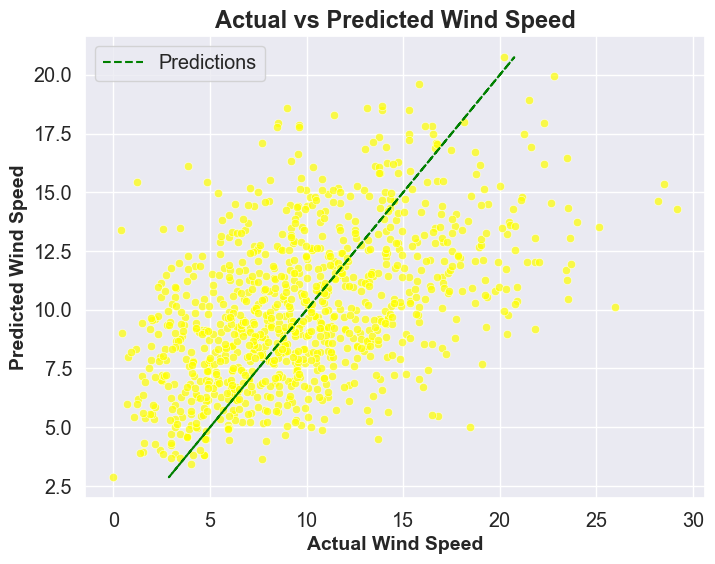

In [25]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test, color='yellow', alpha=0.7)
plt.plot(y_pred_test, y_pred_test, color='green', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Wind Speed', fontsize=17, fontweight='bold')
plt.xlabel('Actual Wind Speed', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Wind Speed', fontsize=14, fontweight='bold')
plt.legend()
plt.show()